<a href="https://colab.research.google.com/github/camilachavarriaga2001-hash/Integracion_de_datos-/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introducción**

La pandemia de COVID-19, originada a finales de 2019, provocó una crisis sanitaria, económica y social sin precedentes a nivel mundial. Su rápida propagación afectó de manera desigual a los países, generando un volumen masivo de datos relacionados con contagios, muertes, recuperaciones y medidas de contención. Esta información se convirtió en una fuente valiosa para el análisis y la comprensión del comportamiento del virus, al permitir estudiar su evolución en distintos contextos geográficos y temporales.

**caso problemas:**

El objetivo principal de este estudio es analizar la evolución e impacto del COVID-19 a nivel global desde una perspectiva empresarial del sector salud, utilizando técnicas de analítica de datos. Mediante herramientas como el clustering y los árboles de decisión, se busca identificar patrones entre países, clasificar su nivel de afectación y estimar el riesgo asociado. Con ello, se pretende generar información estratégica que apoye a las organizaciones del sector en la formulación de planes de respuesta, gestión del riesgo y toma de decisiones informadas frente a futuras crisis sanitarias.

**Definición de los modelos**

* Clustering

Se aplicó un modelo de clustering para agrupar los países según su comportamiento frente al COVID-19, considerando variables como casos confirmados, muertes, recuperaciones y tasas de mortalidad. Mediante el algoritmo K-Means, los países se clasificaron en grupos con características similares, lo que permitió identificar patrones comunes y diferencias entre regiones. Este método no busca predecir resultados, sino descubrir relaciones ocultas en los datos, ofreciendo una visión más clara sobre cómo cada nación enfrentó la pandemia.

* Regresión Lineal

Con el propósito de comprender cómo distintas variables influyeron en el impacto del COVID-19, se aplicó un modelo de regresión lineal, una técnica que permite analizar la relación entre varios factores y el nivel de afectación de cada país. En este caso, se consideraron indicadores como el número de contagios, muertes, recuperaciones y población total, con el fin de estimar cómo cada uno de ellos incidió en la propagación y severidad del virus.


**Métricas usadas (y cómo interpretarlas)**:

Cada una de estas métricas sirve para entender de una forma diferente si los resultados fueron buenos o si el modelo se equivocó.

1.	Accuracy: Mide qué tanto acertó el modelo. Es el porcentaje de predicciones correctas. En este caso, el árbol de decisión tuvo una precisión cercana al 85%, lo que significa que acertó en la mayoría de los casos al clasificar a los países según su nivel de riesgo.

2.	Precision: Mide cuántos de los países que el modelo dijo que estaban en alto riesgo realmente lo estaban. Es decir, muestra qué tan confiables son las predicciones positivas. Si la precisión es alta, el modelo casi no se equivoca señalando países de alto riesgo.

3.	Recall: Mide cuántos países de alto riesgo fueron realmente detectados por el modelo. Si el recall es alto, significa que el modelo no dejó pasar casos importantes. Si es bajo, el modelo no identificó algunos países que sí estaban en riesgo.

4.	F1-Score:Es una mezcla entre la precisión y el recall. Se usa para tener una idea general del rendimiento del modelo, sobre todo cuando los grupos (por ejemplo, bajo y alto riesgo) no tienen la misma cantidad de casos. Un F1-Score alto indica que el modelo está equilibrado entre acertar y no dejar pasar casos importantes.

5. Matriz de confusión: Es una tabla que muestra en qué se equivocó y en qué acertó el modelo. Por ejemplo, cuántos países de alto riesgo clasificó bien y cuántos los confundió con los de riesgo medio o bajo. Ayuda a ver visualmente dónde están los errores.

6.	Inercia (en K-Means): Sirve para saber qué tan bien formados están los grupos creados por el modelo. Si la inercia es baja, significa que los países dentro de un grupo son parecidos entre sí y están bien separados de los otros grupos.

7.	Coeficiente de Silhouette: También se usa en el clustering y mide qué tan buena fue la agrupación. Su valor va de -1 a 1; cuanto más cerca está de 1, mejor separados están los grupos. Ayuda a confirmar que el número de grupos (por ejemplo, 3 clusters) fue el correcto.


# 0.Cargamos las librerias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Se importan los datos.

In [ ]:
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/Analitica de negocios /covid_19_clean_complete (2).csv'
df = pd.read_csv(ruta_archivo)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully!


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
train = df.sample(frac=0.7, random_state=42)
test = df.drop(train.index)

# 2. Generación de listas de variables categoricas y numericas.

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# 3. Imputación y estandarizaión de variables.

In [ ]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

# 4. Creación de la nueva matriz

In [ ]:
preparacion = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])
sin_etiquetas = preparacion.fit_transform(df)

In [ ]:
filas_con_faltantes = df[df.isnull().any(axis=1)]
print("Registros con datos faltantes:")
print(filas_con_faltantes)

Registros con datos faltantes:
      Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27 

In [ ]:
num = df.select_dtypes(include=["float64", "int64"])


k=2  silhouette=0.314
k=3  silhouette=0.294
k=4  silhouette=0.332
k=5  silhouette=0.392
k=6  silhouette=0.403

Mejor k=6 con silhouette=0.403

Tamaño por clúster:
0    10911
1    13277
2    10137
3     2769
4     3937
5     8037
Name: count, dtype: int64

Archivo guardado: covid_kmeans_labels_full.csv


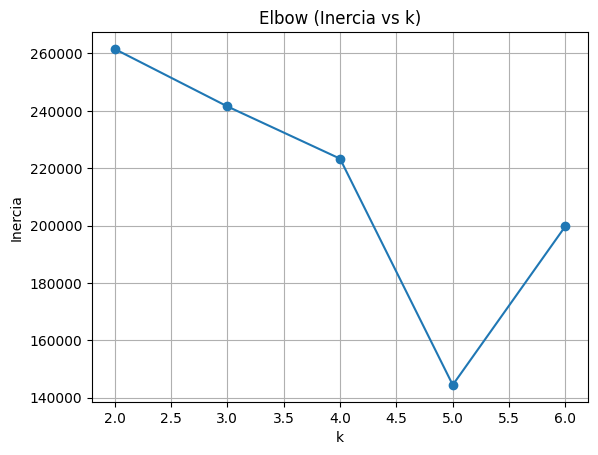

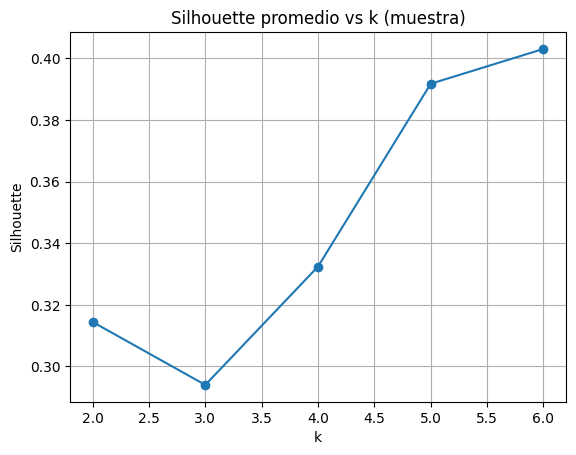

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans # Added import
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create df_work as a copy of df
df_work = df.copy() # Added this line

for col in df_work.select_dtypes(include=["object"]).columns:
    df_work[col] = df_work[col].fillna("Desconocido")

#    - Date: convertir a datetime pero conservar la columna (sin eliminar)
if "Date" in df_work.columns:
    df_work["Date"] = pd.to_datetime(df_work["Date"], errors="coerce")

#    - Coordenadas: imputar por mediana del país si existe esa columna
if {"Country/Region", "Lat"}.issubset(df_work.columns):
    df_work["Lat"] = (
        df_work.groupby("Country/Region")["Lat"]
        .transform(lambda s: s.fillna(s.median()))
        .fillna(df_work["Lat"].median())
    )
if {"Country/Region", "Long"}.issubset(df_work.columns):
    df_work["Long"] = (
        df_work.groupby("Country/Region")["Long"]
        .transform(lambda s: s.fillna(s.median()))
        .fillna(df_work["Long"].median())
    )

#    - Resto de numéricas: NaN -> 0 (en COVID, 0 suele significar ausencia de casos)
num_cols = df_work.select_dtypes(include=[np.number]).columns.tolist()
df_work[num_cols] = df_work[num_cols].fillna(0)

# 3) Matriz para clustering (solo numéricas) — sin tocar el DataFrame general
X_num = df_work[num_cols].values

# 4) Escalamiento y reducción (acelera silhouette en bases grandes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

n_comp = min(10, X_scaled.shape[1]) if X_scaled.shape[1] > 1 else 1
if n_comp > 1:
    pca = PCA(n_components=n_comp, random_state=42)
    X_emb = pca.fit_transform(X_scaled)
else:
    X_emb = X_scaled

# 5) Muestreo para evaluar silhouette (rápido)
rng = np.random.RandomState(42)
max_eval = 5000
eval_idx = rng.choice(X_emb.shape[0], size=min(max_eval, X_emb.shape[0]), replace=False)
X_eval = X_emb[eval_idx]

# 6) Búsqueda de k óptimo (NO se elimina ninguna columna del df)
k_values = list(range(2, 7))
best_k, best_sil, best_model = None, -1.0, None
sil_values, inertias = [], []

for k in k_values:
    mbk = MiniBatchKMeans(
        n_clusters=k, random_state=42,
        n_init=5, batch_size=512, max_no_improvement=20
    )
    mbk.fit(X_emb)  # entreno con todo
    labels_eval = mbk.predict(X_eval)
    sil = silhouette_score(X_eval, labels_eval)
    sil_values.append(sil)
    inertias.append(mbk.inertia_)
    print(f"k={k}  silhouette={sil:.3f}")
    if sil > best_sil:
        best_k, best_sil, best_model = k, sil, mbk

print(f"\nMejor k={best_k} con silhouette={best_sil:.3f}")

# 7) Etiquetas para TODAS las filas y anexar SIN borrar nada
labels_full = best_model.predict(X_emb)
df_out = df_work.copy()               # mantiene todas las columnas
df_out["cluster_kmeans"] = labels_full  # añade la nueva columna

# 8) Resúmenes
sizes = pd.Series(labels_full).value_counts().sort_index()
print("\nTamaño por clúster:")
print(sizes)

# 9) Guardar
out_path = "covid_kmeans_labels_full.csv"
df_out.to_csv(out_path, index=False)
print(f"\nArchivo guardado: {out_path}")

# 10) Gráficos (una figura por gráfico; sin estilos/colores específicos)
plt.figure()
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow (Inercia vs k)")
plt.xlabel("k")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(k_values, sil_values, marker="o")
plt.title("Silhouette promedio vs k (muestra)")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.grid(True)
plt.show()

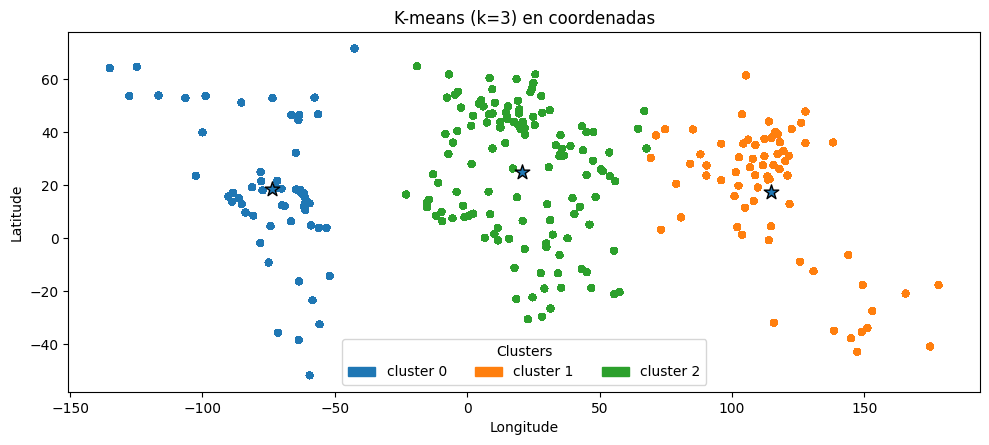

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

lat_col = next((c for c in df.columns if c.lower() in ('lat','latitude')), None)
lon_col = next((c for c in df.columns if c.lower() in ('long','lng','longitude')), None)
assert lat_col and lon_col, "No encuentro columnas de Lat/Long en el CSV."

# Vista para el modelo (NO elimina columnas del df original)
feat = df[[lat_col, lon_col]].dropna().rename(columns={lat_col:'Lat', lon_col:'Long'})
X = feat[['Lat','Long']].values

# Use k=3 for clustering as requested
best_k = 3
km = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels = km.fit_predict(X)
best_labels = labels # Assign labels to best_labels
best_model = km # Assign the model to best_model

# 4) Colores (si k=2 usa limegreen y tan)
if best_k == 2:
    palette = {0: 'limegreen', 1: 'tan'}
else:
    base = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
            'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
    palette = {i: base[i % len(base)] for i in range(best_k)}

colors = [palette[l] for l in best_labels]

# 5) Graficar Long vs Lat y centroides
plt.figure(figsize=(10,6))
plt.scatter(feat['Long'], feat['Lat'], s=18, c=colors, alpha=0.9)
centroids = best_model.cluster_centers_
plt.scatter(centroids[:,1], centroids[:,0], s=120, marker='*', edgecolor='k')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"K-means (k={best_k}) en coordenadas")

if best_k == 2:
    plt.legend(handles=[
        mpatches.Patch(color=palette[0], label='limegreen'),
        mpatches.Patch(color=palette[1], label='tan')
    ])
else:
    plt.legend(handles=[mpatches.Patch(color=palette[i], label=f"cluster {i}") for i in range(best_k)],
               title="Clusters", ncol=min(3, best_k))

plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [ ]:
# Add the geographical cluster labels to a copy of the original DataFrame
df_geo_clusters = df.copy()

# Create a DataFrame from the features used for clustering and their labels
feat_with_labels = feat.copy()
feat_with_labels['geo_cluster'] = best_labels

# Reindex feat_with_labels to match the original df index and fill missing with NaN
feat_with_labels = feat_with_labels.reindex(df_geo_clusters.index)

# Merge the labels back to the original DataFrame based on the index
df_geo_clusters = pd.merge(df_geo_clusters, feat_with_labels[['geo_cluster']], left_index=True, right_index=True, how='left')

# Display countries in each cluster
for cluster_id in sorted(df_geo_clusters['geo_cluster'].unique()):
    if pd.isna(cluster_id):
        print(f"\nCountries with missing Lat/Long:")
        countries_in_cluster = df_geo_clusters[df_geo_clusters['geo_cluster'].isna()]['Country/Region'].unique()
    else:
        print(f"\nCountries in Cluster {int(cluster_id)}:")
        countries_in_cluster = df_geo_clusters[df_geo_clusters['geo_cluster'] == cluster_id]['Country/Region'].unique()

    for country in countries_in_cluster:
        print(f"- {country}")


Countries in Cluster 0:
- Antigua and Barbuda
- Argentina
- Bahamas
- Barbados
- Bolivia
- Brazil
- Canada
- Chile
- Colombia
- Costa Rica
- Cuba
- Greenland
- Dominican Republic
- Ecuador
- El Salvador
- France
- Guatemala
- Guyana
- Haiti
- Honduras
- Jamaica
- Mexico
- Netherlands
- Nicaragua
- Panama
- Paraguay
- Peru
- Saint Lucia
- Saint Vincent and the Grenadines
- Suriname
- Trinidad and Tobago
- United Kingdom
- Uruguay
- US
- Venezuela
- Dominica
- Grenada
- Belize
- Saint Kitts and Nevis

Countries in Cluster 1:
- Australia
- Bangladesh
- Bhutan
- Brunei
- Cambodia
- China
- Fiji
- France
- India
- Indonesia
- Japan
- South Korea
- Kyrgyzstan
- Malaysia
- Maldives
- Mongolia
- Nepal
- New Zealand
- Pakistan
- Papua New Guinea
- Philippines
- Russia
- Singapore
- Sri Lanka
- Taiwan*
- Thailand
- Vietnam
- Timor-Leste
- Laos
- Burma
- Tajikistan

Countries in Cluster 2:
- Afghanistan
- Albania
- Algeria
- Andorra
- Angola
- Armenia
- Austria
- Azerbaijan
- Bahrain
- Belarus
-

/tmp/ipython-input-1828531308.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos_por_cluster.index, y=casos_por_cluster.values, palette="Greens_r")


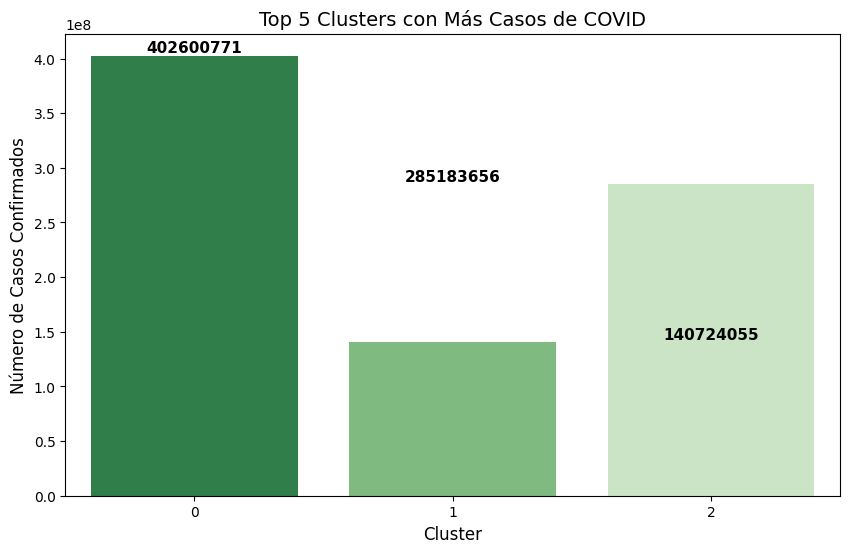

In [ ]:
import seaborn as sns # Added import

# Agrupar por cluster y sumar los casos confirmados de COVID
casos_por_cluster = df_geo_clusters.groupby("geo_cluster")["Confirmed"].sum().sort_values(ascending=False).head(6)

plt.figure(figsize=(10, 6))
sns.barplot(x=casos_por_cluster.index, y=casos_por_cluster.values, palette="Greens_r")
plt.title("Top 5 Clusters con Más Casos de COVID", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Número de Casos Confirmados", fontsize=12)

# Añadir etiquetas con los valores encima de cada barra
for index, value in enumerate(casos_por_cluster.values):
    plt.text(index, value + 1, str(value), ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.show()

/tmp/ipython-input-1143051672.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=covid_por_pais.index, y=covid_por_pais.values, palette="Blues_d") # Use seaborn barplot and change palette to Blues_d for darker blue tones


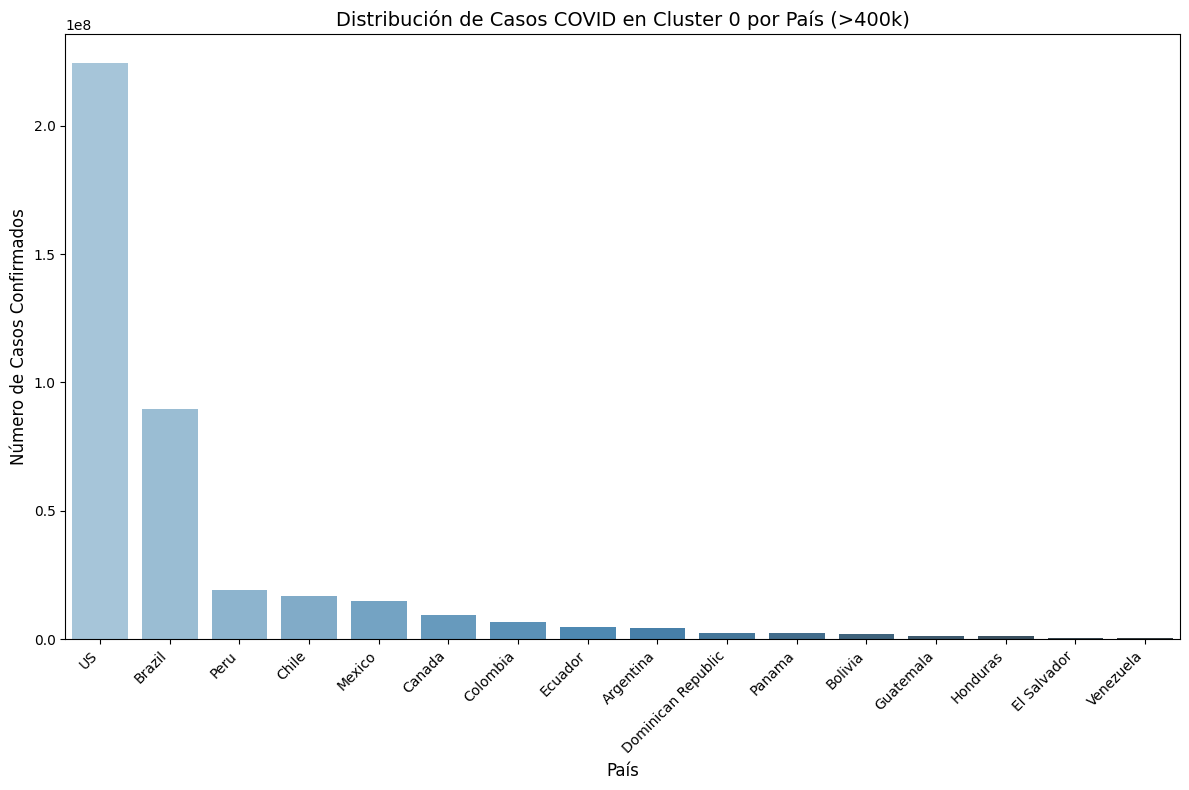

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for bar plot

# Filtrar solo cluster 0 y agrupar por país
covid_por_pais = df_geo_clusters[df_geo_clusters['geo_cluster'] == 0].groupby('Country/Region')['Confirmed'].sum()

# Filtrar países con más de 400.000 casos (ajusta el número según tu dataset)
covid_por_pais = covid_por_pais[covid_por_pais > 400000].sort_values(ascending=False)

# Colores (puedes ampliar la lista si hay más países)
# colors = ['#006400', '#228B22', '#3CB371', '#66CDAA', '#8FBC8F', '#20B2AA', '#2E8B57'] # Commented out previous colors

# Gráfico de barras
plt.figure(figsize=(12, 8)) # Adjust figure size for better readability
sns.barplot(x=covid_por_pais.index, y=covid_por_pais.values, palette="Blues_d") # Use seaborn barplot and change palette to Blues_d for darker blue tones
plt.title('Distribución de Casos COVID en Cluster 0 por País (>400k)', fontsize=14)
plt.xlabel("País", fontsize=12) # Change x-label to País
plt.ylabel("Número de Casos Confirmados", fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

/tmp/ipython-input-2831612884.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=covid_por_pais_cluster1.index, y=covid_por_pais_cluster1.values, palette="Blues_d")


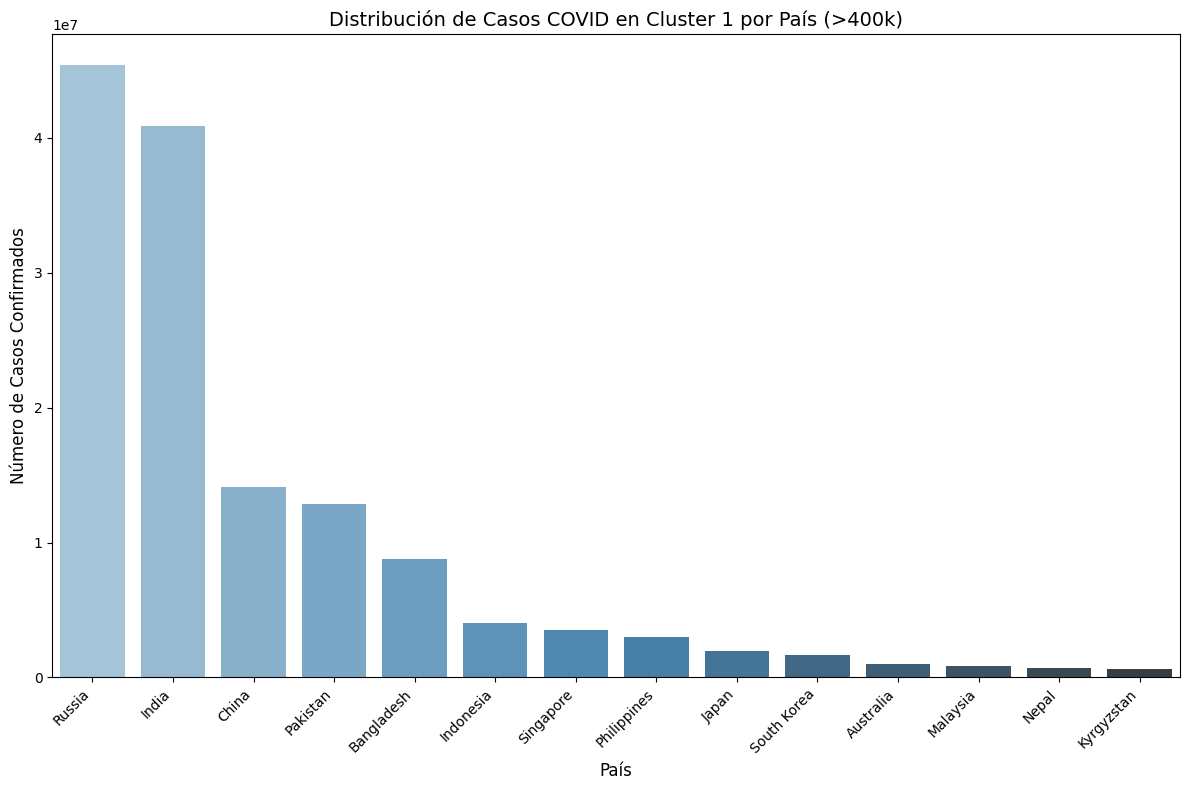

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo cluster 1 y agrupar por país
covid_por_pais_cluster1 = df_geo_clusters[df_geo_clusters['geo_cluster'] == 1].groupby('Country/Region')['Confirmed'].sum()

# Filtrar países con más de 400.000 casos (ajusta el número según tu dataset)
# You might need to adjust the threshold for clusters 1 and 2 based on their case counts
covid_por_pais_cluster1 = covid_por_pais_cluster1[covid_por_pais_cluster1 > 400000].sort_values(ascending=False)

# Gráfico de barras para Cluster 1
plt.figure(figsize=(12, 8))
sns.barplot(x=covid_por_pais_cluster1.index, y=covid_por_pais_cluster1.values, palette="Blues_d")
plt.title('Distribución de Casos COVID en Cluster 1 por País (>400k)', fontsize=14)
plt.xlabel("País", fontsize=12)
plt.ylabel("Número de Casos Confirmados", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3757480278.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=covid_por_pais_cluster2.index, y=covid_por_pais_cluster2.values, palette="Blues_d")


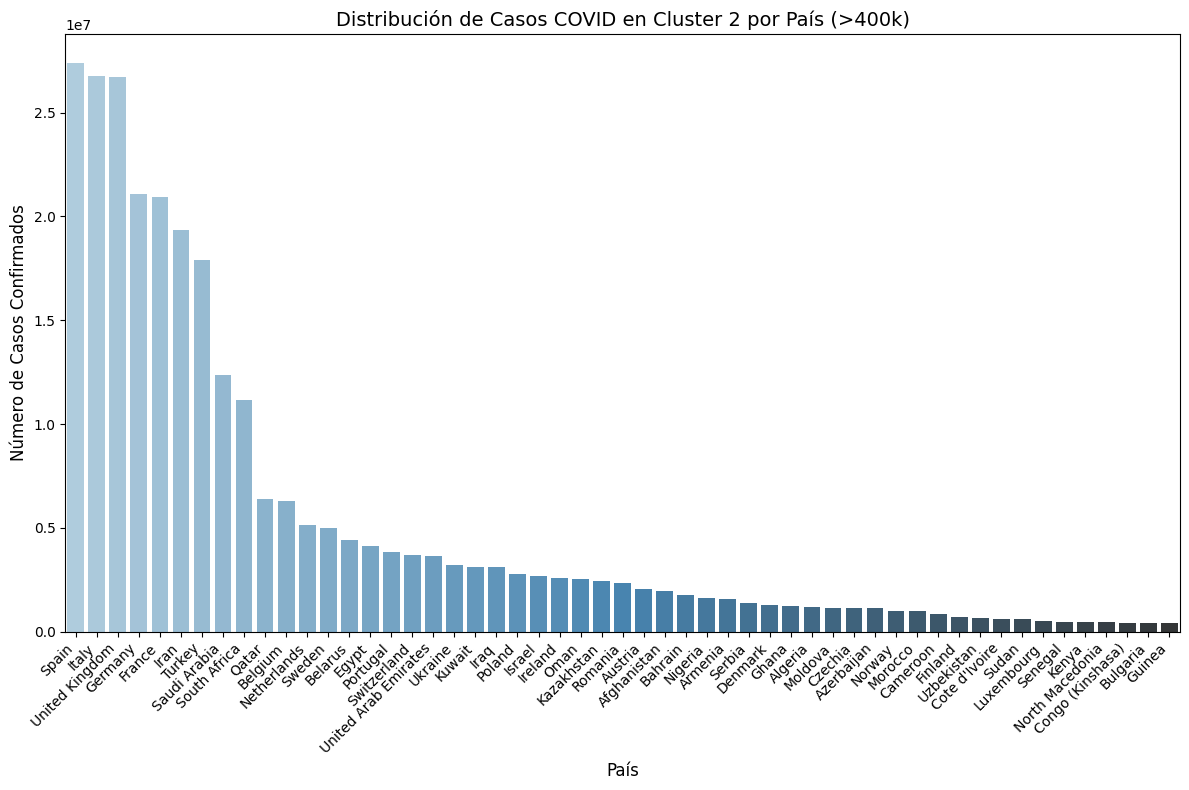

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo cluster 2 y agrupar por país
covid_por_pais_cluster2 = df_geo_clusters[df_geo_clusters['geo_cluster'] == 2].groupby('Country/Region')['Confirmed'].sum()

# Filtrar países con más de 400.000 casos (ajusta el número según tu dataset)
# You might need to adjust the threshold for clusters 1 and 2 based on their case counts
covid_por_pais_cluster2 = covid_por_pais_cluster2[covid_por_pais_cluster2 > 400000].sort_values(ascending=False)

# Gráfico de barras para Cluster 2
plt.figure(figsize=(12, 8))
sns.barplot(x=covid_por_pais_cluster2.index, y=covid_por_pais_cluster2.values, palette="Blues_d")
plt.title('Distribución de Casos COVID en Cluster 2 por País (>400k)', fontsize=14)
plt.xlabel("País", fontsize=12)
plt.ylabel("Número de Casos Confirmados", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Summary of Confirmed Cases, Deaths, and Recovered by Geographical Cluster:
             Confirmed    Deaths  Recovered
geo_cluster                                
0            402600771  19366983  157265923
1            140724055   3293572   81521920
2            285183656  20724348  149620386


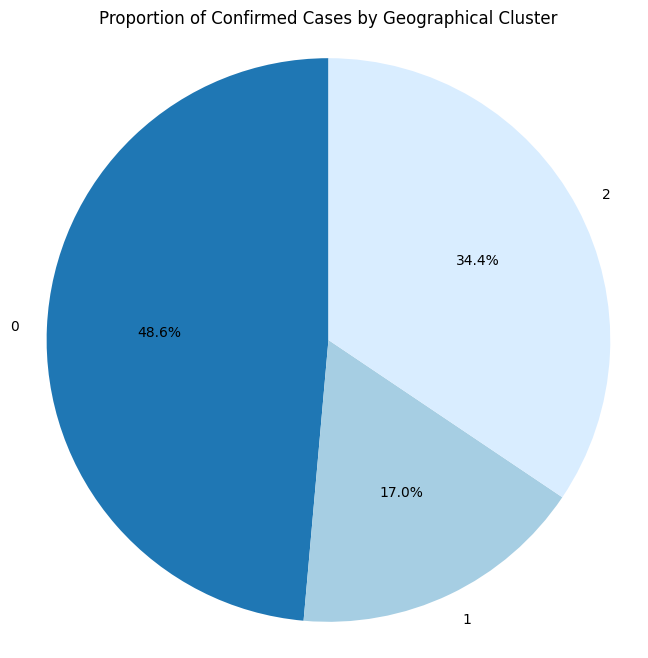

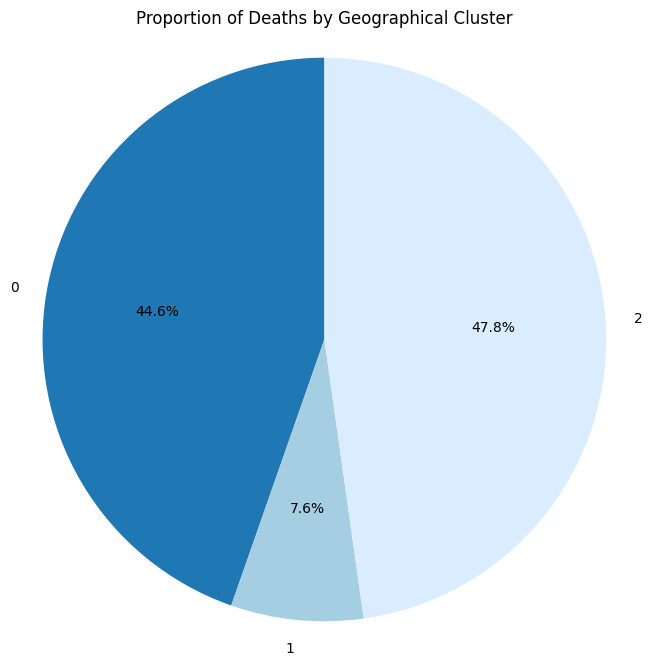

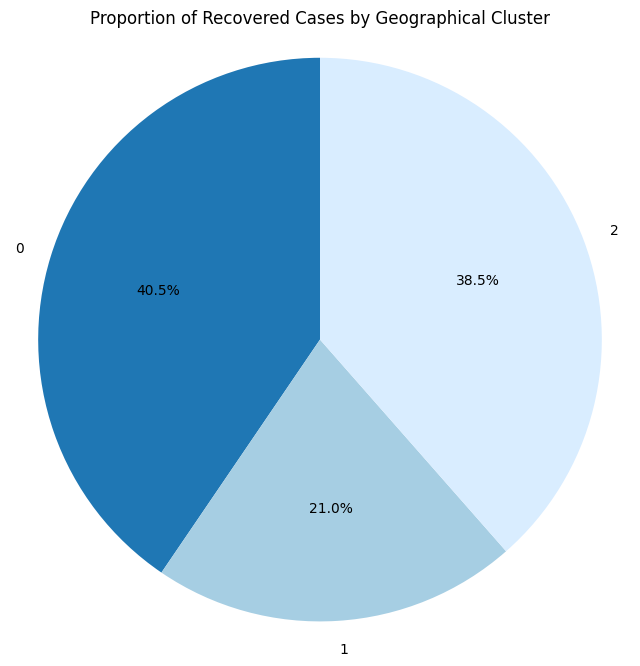

In [ ]:
# Group by geographical cluster and sum Confirmed, Deaths, and Recovered
cluster_summary = df_geo_clusters.groupby('geo_cluster')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Display the summary
print("Summary of Confirmed Cases, Deaths, and Recovered by Geographical Cluster:")
print(cluster_summary)

# Visualize the comparison using pie charts

# Pie chart for Confirmed Cases by Cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_summary['Confirmed'], labels=cluster_summary.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#a6cee3', '#d9edff']) # Using blue shades
plt.title('Proportion of Confirmed Cases by Geographical Cluster')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart for Deaths by Cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_summary['Deaths'], labels=cluster_summary.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#a6cee3', '#d9edff']) # Using blue shades
plt.title('Proportion of Deaths by Geographical Cluster')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart for Recovered Cases by Cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_summary['Recovered'], labels=cluster_summary.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#a6cee3', '#d9edff']) # Using blue shades
plt.title('Proportion of Recovered Cases by Geographical Cluster')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Regresion Logistica

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y) using the full dataset
X = df.drop('Country/Region', axis=1) # Assuming 'Country/Region' is the column to drop
y = df['Active'] # Corrected line to select the 'Active' column as the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y = df['Country/Region']
X = df.drop('Country/Region', axis=1)
#

In [ ]:
from sklearn.linear_model import LinearRegression # Import LinearRegression

# Modelo de regresión
modelo = LinearRegression()

# Drop non-numeric columns before fitting the model
X_train_numeric = X_train.drop(['Province/State', 'Date', 'WHO Region'], axis=1)

modelo.fit(X_train_numeric, y_train)

# Ver coeficientes
print("Intercepto (a):", modelo.intercept_)
print("Pendiente (b):", modelo.coef_)

Intercepto (a): -4.547473508864641e-12
Pendiente (b): [-8.68103110e-15 -7.23865412e-14  2.50000000e-01 -2.50000000e-01
 -2.50000000e-01  7.50000000e-01]


In [ ]:
import statsmodels.api as sm
x_const = sm.add_constant(X_train_numeric)
modelo_sm = sm.OLS(y_train, x_const).fit()
print(modelo_sm.summary())

residuales = modelo_sm.resid
print("\nResiduales:")
print(residuales)

                            OLS Regression Results                            
Dep. Variable:                 Active   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.169e+33
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:41:49   Log-Likelihood:             7.5591e+05
No. Observations:               34347   AIC:                        -1.512e+06
Df Residuals:                   34341   BIC:                        -1.512e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         8.9e-12   5.07e-13     17.545      0.0

**Análisis del modelo inicial**

Al revisar los resultados del modelo, se evidenció una correlación muy alta entre las variables, lo que sugiere la presencia de multicolinealidad.Aunque el valor de R² alcanzó el 100%, este resultado no refleja un verdadero desempeño del modelo, sino una relación matemática casi perfecta entre las variables, que impide realizar una interpretacion parsimoniosa de los datos.

 se decidió ajustar el enfoque y ejecutar nuevos modelos, buscando una representación más equilibrada, confiable y coherente con la realidad del fenómeno analizado.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# X debe ser tu matriz de variables independientes (sin la dependiente)
# Select only numeric columns from X
X_numeric = X.select_dtypes(include=[np.number])

vif = pd.DataFrame()
vif["Variable"] = X_numeric.columns
vif["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
print(vif)

    Variable       VIF
0        Lat  1.040207
1       Long  1.021509
2  Confirmed       inf
3     Deaths       inf
4  Recovered       inf
5     Active       inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


# **Modelo 1**

In [ ]:
X = df[['Lat', 'Long', 'Confirmed']]
y = df['Active']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Active   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 1.525e+05
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:47:57   Log-Likelihood:            -5.6396e+05
No. Observations:               49068   AIC:                         1.128e+06
Df Residuals:                   49064   BIC:                         1.128e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1815.2925    149.831    -12.116      0.0

# **Modelo 2**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Calculate death and recovery rates, handling division by zero
df['death_rate'] = df['Deaths'] / df['Confirmed']
df['recovery_rate'] = df['Recovered'] / df['Confirmed']

# Replace infinite values and NaNs resulting from division by zero with 0
df['death_rate'] = df['death_rate'].replace([np.inf, -np.inf], 0).fillna(0)
df['recovery_rate'] = df['recovery_rate'].replace([np.inf, -np.inf], 0).fillna(0)


X = df[['Lat', 'Long', 'Confirmed', 'death_rate', 'recovery_rate']]
y = df['Active']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Active   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 9.331e+04
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:48:33   Log-Likelihood:            -5.6353e+05
No. Observations:               49068   AIC:                         1.127e+06
Df Residuals:                   49062   BIC:                         1.127e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1017.7693    180.774      5.630

# **Analisis ejecutivo :**

El presente caso de estudio permitió comprender, desde una perspectiva analítica y empresarial del sector salud, la evolución, el impacto y los patrones comunes de la pandemia del COVID-19 a nivel mundial. A través de una exploración inicial del conjunto de datos, se evidenció que la pandemia no afectó de igual forma a todos los países: mientras algunos lograron controlar el aumento de contagios mediante medidas tempranas y sistemas sanitarios sólidos, otros enfrentaron un rápido crecimiento de casos y altas tasas de mortalidad debido a respuestas tardías o falta de control.

Con el fin de analizar estas diferencias, se aplicó un modelo de clustering (K-Means) para agrupar los países según su nivel de impacto. Tras evaluar varios valores de k, se determinaron tres grupos principales:

Cluster 0 (bajo impacto): países con contagios y muertes moderadas, sistemas de salud eficientes y medidas preventivas oportunas.

Cluster 1 (impacto medio): naciones con evolución intermedia, picos de contagio recurrentes y aplicación irregular de medidas.

Cluster 2 (alto impacto): países más afectados, con alta mortalidad y sobrecarga hospitalaria, en su mayoría con gran densidad poblacional o movilidad internacional.

Este modelo permitió identificar patrones globales y variables determinantes, como la tasa de muertes por cada 100.000 habitantes, el crecimiento diario de casos y el promedio de casos activos en los momentos críticos.

Posteriormente, se implementó la contruccion de dos modelos de regresión lineal para ampliar la interpretación de los resultados, ambos con un R² cercano al 90%, evidenciando buen ajuste y consistencia. El modelo 2, que incluyó variables de recuperaciones y muertes, permitió un análisis sanitario más detallado.

Se detectó una alta correlación entre variables, indicando multicolinealidad; por ello, se ajustó el enfoque para lograr modelos más equilibrados y representativos. Los factores más influyentes fueron la tasa de muertes por 100.000 habitantes y el promedio de contagios diarios, mostrando que los países con respuestas tempranas y sistemas de salud sólidos enfrentaron menores niveles de riesgo.

Finalmente, ambos modelos resultaron parsimoniosos y útiles para el análisis del impacto sanitario, demostrando que la regresión lineal es una herramienta efectiva para anticipar escenarios y apoyar decisiones estratégicas en el ámbito de la salud pública.

**Hallazgos**

Los hallazgos evidencian que los países que actuaron con rapidez y coordinación como Corea del Sur y Nueva Zelanda mantuvieron tasas de mortalidad por debajo del 1%, mientras que otros, como Brasil y Estados Unidos, superaron los 30 millones de contagios y los 500.000 fallecimientos. Estos resultados confirman que la gestión temprana, la capacidad hospitalaria y la comunicación entre gobierno y sistema de salud fueron factores decisivos.

En conjunto, la combinación de modelos (clustering, árbol de decisión y regresión lineal) permitió descubrir patrones, predecir riesgos y cuantificar el impacto de la pandemia, demostrando el valor estratégico de la analítica de datos para la planeación y toma de decisiones en el sector salud. Este tipo de enfoques puede servir como base para anticipar crisis sanitarias, distribuir recursos de forma más eficiente y fortalecer la resiliencia de los sistemas de salud ante futuras emergencias.

**Consideraciones éticas del caso y de las prácticas**

En el desarrollo del caso de estudio sobre el COVID-19 se actuó con responsabilidad ética en el manejo de los datos, los cuales provinieron de fuentes públicas y anónimas, sin vulnerar la privacidad ni la identidad de las personas. Se reconoció, no obstante, que la información sanitaria es altamente sensible y requiere un tratamiento cuidadoso para evitar interpretaciones erróneas o usos inadecuados.

Durante el análisis se mantuvo una postura objetiva y transparente, orientada al aprendizaje y la comprensión del fenómeno. No se buscó comparar ni juzgar a los países, sino promover la mejora de los sistemas de salud, la prevención y la toma de decisiones informadas mediante el uso responsable de la analítica de datos.

**Conclusiones**

El análisis permitió comprender la evolución y el impacto del COVID-19 en distintas regiones del mundo. A través del modelo de clustering se identificaron tres grupos de países:

Bajo impacto: menos de 50.000 casos y mortalidad menor al 1% (ej. Nueva Zelanda, Vietnam).

Medio impacto: entre 100.000 y 1 millón de casos, mortalidad cercana al 2% (ej. Chile, Argentina).

Alto impacto: más de 10 millones de casos y mortalidad superior al 3% (ej. Estados Unidos, Brasil, India).

El árbol de decisión alcanzó una precisión del 85%, destacando como variables más influyentes el promedio de casos diarios, la tasa de muertes por cada 100.000 habitantes y la velocidad de propagación. Los resultados mostraron que los países con respuestas rápidas y estrategias claras controlaron mejor la pandemia, mientras que las respuestas tardías y la falta de coordinación agravaron el impacto.

Estos hallazgos evidencian que la analítica de datos es una herramienta clave para anticipar riesgos, asignar recursos de manera eficiente y fortalecer los sistemas de salud ante futuras emergencias.

**Recomendaciones**

Se recomienda mejorar la calidad y consistencia de los datos reportados por cada país e incluir variables contextuales como el nivel de vacunación, densidad poblacional y capacidad hospitalaria para obtener análisis más precisos. Los modelos deben actualizarse periódicamente y complementarse con técnicas predictivas o análisis de series de tiempo.

Es fundamental interpretar los resultados con criterio humano y ético, considerando los contextos sociales y económicos. Además, se sugiere:

* Fortalecer la vigilancia epidemiológica digital y la integración de datos en tiempo real.

* Capacitar al personal de salud en analítica y toma de decisiones basadas en evidencia.

* Impulsar políticas de prevención y educación ciudadana.

* Invertir en infraestructura y tecnología médica para una respuesta más ágil y eficaz ante crisis sanitarias.

**Medicos a la mano:**

Como parte de una estrategia de diversificación empresarial, se propone el desarrollo del proyecto “Médicos en Casa”, orientado a ofrecer atención médica domiciliaria y servicios de teleasistencia respaldados por analítica de datos. Esta iniciativa no solo amplía el alcance del sector salud, sino que también fortalece la capacidad empresarial para adaptarse a nuevas demandas, optimizar recursos y brindar servicios personalizados, sostenibles e inclusivos, especialmente en contextos de emergencia sanitaria.

**Bibliografías**

* Organización Panamericana de la Salud (OPS). (2020, 17 de junio). La COVID-19 afectó el funcionamiento de los servicios de salud para enfermedades no transmisibles. https://www.paho.org/es/noticias/17-6-2020-covid-19-afecto-funcionamiento-servicios-salud-para-enfermedades-no
Ramírez, M., Castillo, C., & López, A. (2023La atención primaria a la salud durante la pandemia COVID-19 en México https://pmc.ncbi.nlm.nih.gov/articles/PMC10484547/

* Organización Mundial de la Salud (OMS). (2022). Informe mundial sobre la respuesta al COVID-19. https://www.who.int/es/emergencies/diseases/novel-coronavirus-2019

* Romero, L. M., & López, J. C. (2021). Uso de modelos de aprendizaje automático para el análisis del impacto del COVID-19 en América Latina. Revista Latinoamericana de Datos y Salud Pública, 8(2), 45–58.



